<a href="https://colab.research.google.com/github/anandprakashyadav735/Cat-vs-Dog-Classification-/blob/main/cat_vs_dog_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:50<00:00, 22.4MB/s]
100% 1.06G/1.06G [00:50<00:00, 22.7MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D, Flatten


In [ ]:
# generators
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# create a CNN model

model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))




In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 32)        0

In [ ]:
model.compile(optimizer="adam",loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 57s 80ms/step - loss: 0.5952 - accuracy: 0.6698 - val_loss: 0.4924 - val_accuracy: 0.7642
Epoch 2/10
625/625 [==============================] - 53s 85ms/step - loss: 0.4679 - accuracy: 0.7764 - val_loss: 0.4634 - val_accuracy: 0.7836
Epoch 3/10
625/625 [==============================] - 50s 80ms/step - loss: 0.3609 - accuracy: 0.8393 - val_loss: 0.5390 - val_accuracy: 0.7680
Epoch 4/10
625/625 [==============================] - 52s 83ms/step - loss: 0.2285 - accuracy: 0.9042 - val_loss: 0.6617 - val_accuracy: 0.7972
Epoch 5/10
625/625 [==============================] - 49s 78ms/step - loss: 0.1321 - accuracy: 0.9498 - val_loss: 0.8545 - val_accuracy: 0.7808
Epoch 6/10
625/625 [==============================] - 47s 75ms/step - loss: 0.0784 - accuracy: 0.9729 - val_loss: 1.0788 - val_accuracy: 0.7870
Epoch 7/10
625/625 [==============================] - 46s 74ms/step - loss: 0.0583 - accuracy: 0.9798 - val_loss: 1.0555 - val_accuracy:

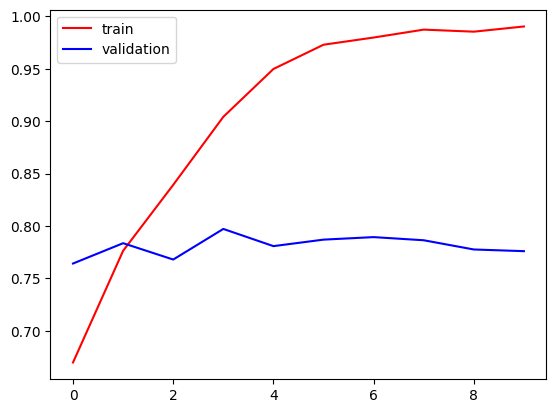

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

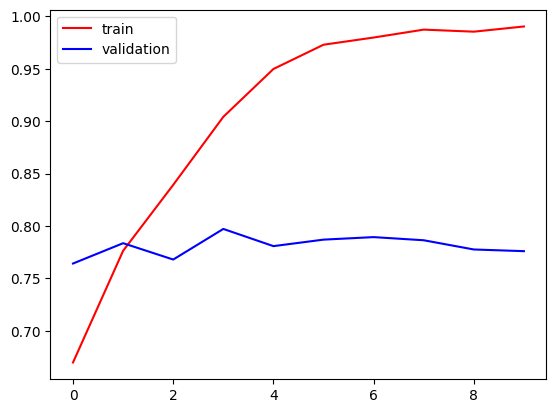

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_img=cv2.imread('/content/cat.jpg')

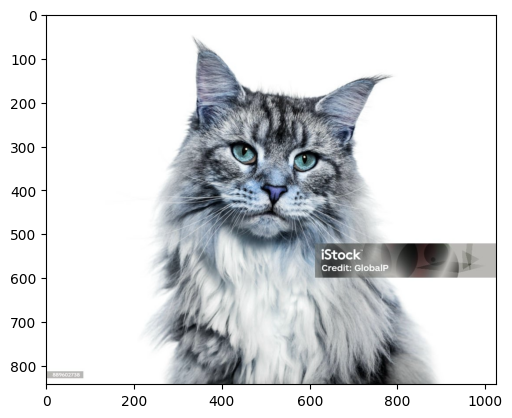

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(test_img)


In [ ]:
test_img.shape

(842, 1024, 3)

In [ ]:
test_img=cv2.resize(test_img,(256,256))

In [ ]:
test_input=test_img.reshape(1,256,256,3)

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 27ms/step


array([[0.]], dtype=float32)